In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os


In [5]:
train_data_dir = r'C:\Users\Anjali\Downloads\Agricultural-crops'

In [24]:
datagen = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2  
)


train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),  
    color_mode='grayscale',  
    batch_size=32,
    class_mode='categorical',  
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 674 images belonging to 30 classes.
Found 155 images belonging to 30 classes.


In [25]:

x_train = np.concatenate([next(train_generator)[0] for _ in range(train_generator.samples // train_generator.batch_size)])
x_test = np.concatenate([next(validation_generator)[0] for _ in range(validation_generator.samples // validation_generator.batch_size)])


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 128, 128, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 128, 128, 1))
x_train = np.reshape(x_train, (len(x_train), 128, 128, 1))
x_test = np.reshape(x_test, (len(x_test), 128, 128, 1))


In [26]:
def build_autoencoder():
    model = keras.Sequential()


    model.add(layers.Input(shape=(28, 28, 1)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

  
    model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))

    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))

    model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return model

In [27]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 618ms/step - loss: 0.6935 - val_loss: 0.6920
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - loss: 0.6915 - val_loss: 0.6885
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 504ms/step - loss: 0.6868 - val_loss: 0.6810
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - loss: 0.6783 - val_loss: 0.6681
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 497ms/step - loss: 0.6637 - val_loss: 0.6519
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 500ms/step - loss: 0.6482 - val_loss: 0.6353
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 502ms/step - loss: 0.6343 - val_loss: 0.6352
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 504ms/step - loss: 0.6289 - val_loss: 0.6269
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 517ms/step - loss: 0.6237 - val_loss: 0.6254
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step - loss: 0.6233 - val_loss: 0.6239
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 501ms/step - loss: 0.6219 - val_loss: 0.6221
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step - loss: 0.6191 - val_lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


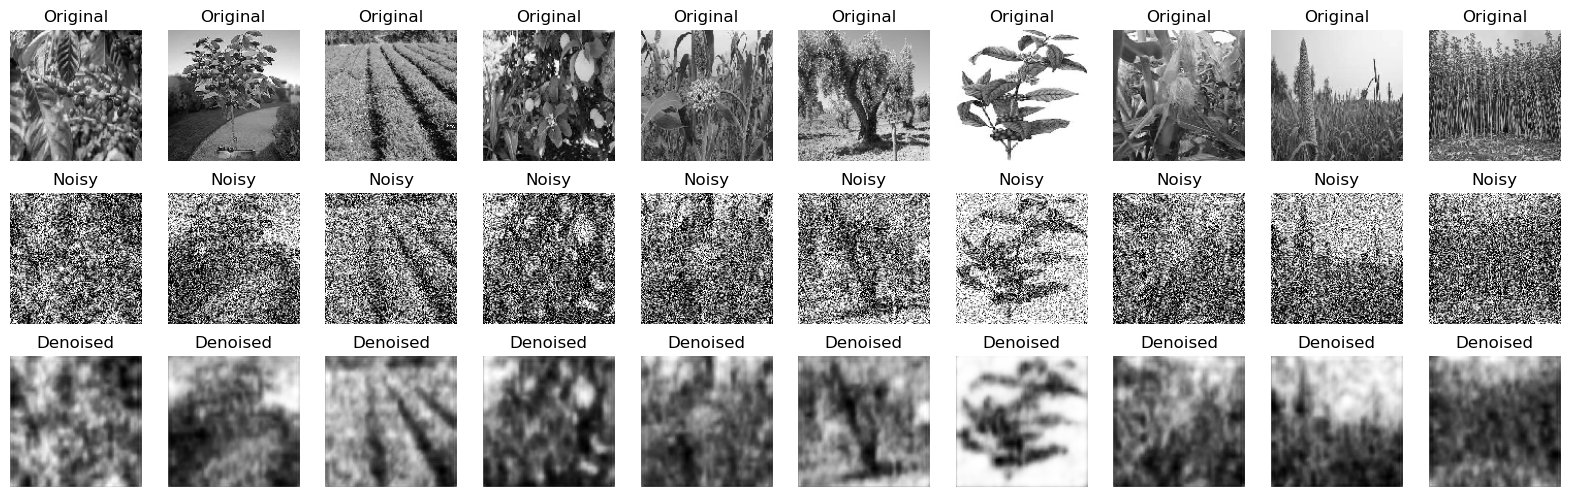

In [28]:

denoised_images = autoencoder.predict(x_test_noisy)

n = 10  
plt.figure(figsize=(20, 6))
for i in range(n):
   
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(128,128), cmap='gray')  
    plt.title("Original")
    plt.axis("off")

  
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(128, 128), cmap='gray')  
    plt.title("Noisy")
    plt.axis("off")

 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(128, 128), cmap='gray')  
    plt.title("Denoised")
    plt.axis("off")

plt.show()


In [ ]:
s